In [2]:
!pip install scikit-learn

In [3]:
!pip install pandas

In [4]:
!pip install seaborn matplotlib

GÖREV 1 -Test verilerini hazırlama-

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
dataNum = 100
noise = 0.1
#Düz sınıf (z: 9.8)
Duz_x = np.random.normal(0.0, scale=noise, size=dataNum)
Duz_y = np.random.normal(0.0, scale=noise, size=dataNum)
Duz_z = np.random.normal(9.8, scale=noise, size=dataNum)

#Ters sınıf (z: -9.8)
Ters_x = np.random.normal(0.0, scale=noise, size=dataNum)
Ters_y = np.random.normal(0.0, scale=noise, size=dataNum)
Ters_z = np.random.normal(-9.8, scale=noise, size=dataNum)

xDuz = np.column_stack([Duz_x, Duz_y, Duz_z])
xTers = np.column_stack([Ters_x, Ters_y, Ters_z])
xTotal = np.vstack([xDuz, xTers])

y_duz = np.zeros(100)
y_ters = np.ones(100)
yTotal = np.hstack([y_duz, y_ters])
df = pd.DataFrame(data={
    "ivmeX": xTotal[:, 0],
    "ivmeY": xTotal[:, 1],
    "ivmeZ": xTotal[:, 2],
    "durum": yTotal
})
df = df.astype({
    "ivmeX": "float32",
    "ivmeY": "float32",
    "ivmeZ": "float32",
    "durum": "int8"
})
print(df.memory_usage(deep=True).sum())
df.head(10)




2732


,ivmeX,ivmeY,ivmeZ,durum
0,0.049671,-0.141537,9.835779,0
1,-0.013826,-0.042065,9.856078,0
2,0.064769,-0.034271,9.908305,0
3,0.152303,-0.080228,9.905380,0
4,-0.023415,-0.016129,9.662233,0
5,-0.023414,0.040405,9.706218,0
6,0.157921,0.188619,9.851503,0
7,0.076743,0.017458,9.851378,0
8,-0.046947,0.025755,9.851504,0
9,0.054256,-0.007445,10.185273,0


GÖREV 2 -Veriyi Görselleştirme/Okuma-

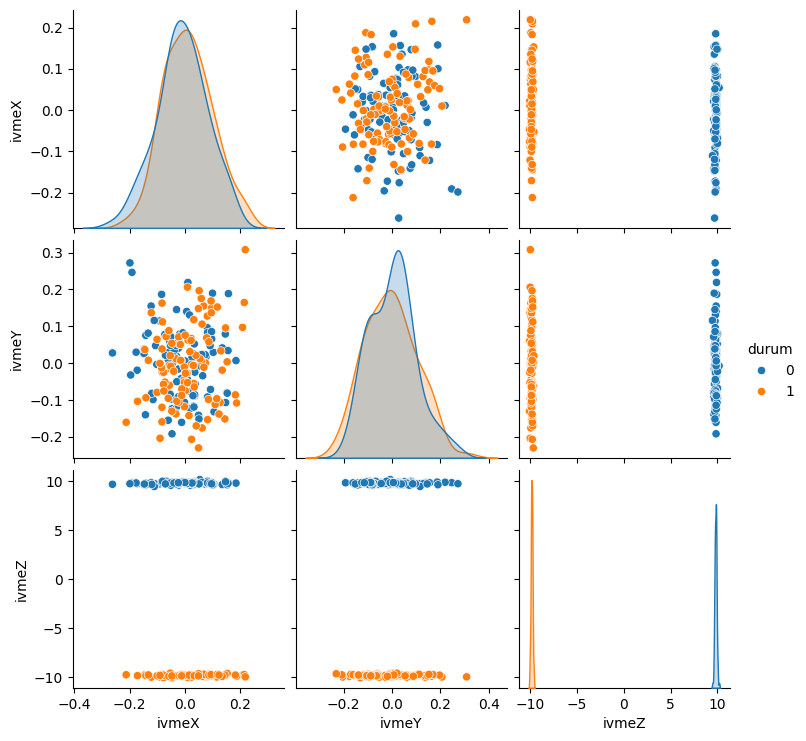

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="durum", vars=["ivmeX", "ivmeY", "ivmeZ"], diag_kind="kde")

GÖREV 3 -Eğitim ve test verilerini ayırma-

In [7]:
from sklearn.model_selection import train_test_split
X = df[["ivmeX","ivmeY", "ivmeZ"]]
Y = df["durum"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

GÖREV 4 -Verileri StandardScaled (ortak aralıkta) yap-

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #scaler objesini oluştur

#scaler'ı eğit ardından scaled test ve train verisini hesapla
scaler.fit(XTrain)
scaledXTrain = scaler.transform(XTrain)
scaledXTest = scaler.transform(XTest)

#tekrar df yap
scaledXTrainDf = pd.DataFrame(scaledXTrain)
scaledXTrainDf.describe()




,0,1,2
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,-1.192093e-08,-2.980232e-09,3.576279e-08
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-2.567169e+00,-2.019967e+00,-1.023783e+00
25%,-6.659398e-01,-8.181077e-01,-9.981772e-01
50%,-1.180092e-02,2.981646e-02,-4.501939e-03
75%,6.083211e-01,6.133142e-01,1.000392e+00
max,2.567843e+00,2.912234e+00,1.038752e+00


GÖREV 5 -Modeli oluştur-

In [9]:
!pip install tensorflow

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#modelin yapısını oluştur
model = Sequential()
model.add(Dense(8, input_shape=[3], activation="relu")) #gizli katman 1
model.add(Dense(4, activation="relu")) #gizli katman 2
model.add(Dense(1, activation="sigmoid")) #çıkış katmanı

#modeli derle (compile)/eğitime hazırla
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "precision", "recall"])

#özete bak
model.summary()


c:\Users\User\Desktop\yazilim\python\veri bilimi\gemini\dersler\DEMO İHA PROJECTS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

GÖREV 6 -modeli eğitme-

In [11]:
model.fit(scaledXTrain, YTrain, epochs=30, batch_size=10, validation_data=(scaledXTest, YTest))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9000 - loss: 0.5598 - precision: 0.8721 - recall: 0.9375 - val_accuracy: 0.8750 - val_loss: 0.5618 - val_precision: 0.8947 - val_recall: 0.8500
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8813 - loss: 0.5413 - precision: 0.9420 - recall: 0.8125 - val_accuracy: 0.8750 - val_loss: 0.5402 - val_precision: 0.8947 - val_recall: 0.8500
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9312 - loss: 0.5202 - precision: 0.9481 - recall: 0.9125 - val_accuracy: 0.9250 - val_loss: 0.5159 - val_precision: 0.9048 - val_recall: 0.9500
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9563 - loss: 0.4961 - precision: 0.9620 - recall: 0.9500 - val_accuracy: 0.9250 - val_loss: 0.4889 - val_precision: 0.9048 - val_recall: 0.9500
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9812 - loss: 0.4699 - precision: 0.9639 - recall: 1.0000 - val_accuracy: 0.9250 - val_loss: 0.4611 - va

GÖREV 7 -karne notunu(başarıyı) kaydetmek ve yeni testler-

In [12]:
loss, accuracy, precision, recall = model.evaluate(scaledXTest, YTest)
print(f"Test Kaybı (Loss): {loss:.4f}")
print(f"Test Başarısı (Accuracy): {accuracy * 100:.2f}%")
print(f"Test Kesinlik (Precision): {precision * 100:.2f}%")
print(f"Test Duyarlılık (Recall): {recall * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0425 - precision: 1.0000 - recall: 1.0000 
Test Kaybı (Loss): 0.0425
Test Başarısı (Accuracy): 100.00%
Test Kesinlik (Precision): 100.00%
Test Duyarlılık (Recall): 100.00%


In [13]:
newData = np.array([[0.0,0.0,-9.8]])
scalednewData = scaler.transform(newData)

predictNewData = model.predict(scalednewData)
print(predictNewData)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.9847008]]


c:\Users\User\Desktop\yazilim\python\veri bilimi\gemini\dersler\DEMO İHA PROJECTS\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


-*OPTİMİZASYON ÇILGINLIĞI*-

In [14]:
!pip install h5py

In [15]:
import os
model.save("unoptimizedmodel.h5")

In [16]:
fileSizeinBytes = os.path.getsize("unoptimizedmodel.h5")
fileSizeinKBytes = fileSizeinBytes / 1024
print(f"Optimize edilmemiş model: {fileSizeinKBytes:.2f}KB")

Optimize edilmemiş model: 27.94KB


In [17]:
#TFLİTE İLE LİTE MODEL ÜRETİMİ
converter = tf.lite.TFLiteConverter.from_keras_model(model) #converter'ı tanımla
converter.optimizations = [tf.lite.Optimize.DEFAULT] #default optimizer

#int8'e çevirmek için map(veri seti) hazırlama
def generate_dataSet():
    for x in range(len(scaledXTrain)):
        yield [scaledXTrain[x:x+1].astype(np.float32)]

converter.representative_dataset = generate_dataSet
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8] #tüm weights (ağırlıklar) int8 olsun.
#giriş-çıkış layer'ları da int8 olsun.
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

optimizedmodel = converter.convert()

with open("optimizedmodel.tflite", "wb") as f:
    f.write(optimizedmodel)

fileSizeinBytesOptimized = os.path.getsize("optimizedmodel.tflite")
fileSizeinKBytesOptimized = fileSizeinBytesOptimized / 1024

print(f"Optimized file size {fileSizeinKBytesOptimized:.2f}KB")



INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp5qv8k9r0\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp5qv8k9r0\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmp5qv8k9r0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2018221373392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2018221374736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2018221374352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2018221375120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2018221373776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2018221373968: TensorSpec(shape=(), dtype=tf.resource, name=None)


c:\Users\User\Desktop\yazilim\python\veri bilimi\gemini\dersler\DEMO İHA PROJECTS\.venv\Lib\site-packages\tensorflow\lite\python\convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Optimized file size 2.69KB
